In [1]:
import pandas as pd
import seaborn as sns
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/opt/ml/input/data/train_data.csv')
df

,userID,assessmentItemID,testId,answerCode,Timestamp,KnowledgeTag
0,0,A060001001,A060000001,1,2020-03-24 00:17:11,7224
1,0,A060001002,A060000001,1,2020-03-24 00:17:14,7225
2,0,A060001003,A060000001,1,2020-03-24 00:17:22,7225
3,0,A060001004,A060000001,1,2020-03-24 00:17:29,7225
4,0,A060001005,A060000001,1,2020-03-24 00:17:36,7225
...,...,...,...,...,...,...
2266581,7441,A030071005,A030000071,0,2020-06-05 06:50:21,438
2266582,7441,A040165001,A040000165,1,2020-08-21 01:06:39,8836
2266583,7441,A040165002,A040000165,1,2020-08-21 01:06:50,8836
2266584,7441,A040165003,A040000165,1,2020-08-21 01:07:36,8836


In [5]:
tag = df['KnowledgeTag'].unique()
tag.sort()

correct_ct = []
incorrect_ct = []
ratio = []

for t in tqdm(tag):
    by_tag = df[df['KnowledgeTag'] == t]['answerCode']
    ct = by_tag.sum()
    neg_ct = len(by_tag)-ct
    r = round(ct/len(by_tag)*100, 2)
    
    correct_ct.append(ct)
    incorrect_ct.append(neg_ct)
    ratio.append(r)

100%|██████████| 912/912 [00:03<00:00, 281.30it/s]


In [6]:
count_by_tag = pd.DataFrame(data={"KnowledgeTag":tag, "correct":correct_ct, "incorrect":incorrect_ct, "correctRatio":ratio})
count_by_tag

,KnowledgeTag,correct,incorrect,correctRatio
0,23,1052,748,58.44
1,24,220,138,61.45
2,25,79,13,85.87
3,26,1494,938,61.43
4,30,289,250,53.62
...,...,...,...,...
907,11253,3166,1116,73.94
908,11265,307,147,67.62
909,11269,1348,1069,55.77
910,11270,125,136,47.89


In [8]:
count_by_tag.describe()

,KnowledgeTag,correct,incorrect,correctRatio
count,912.000000,912.000000,912.000000,912.000000
mean,5179.595395,1626.321272,858.970395,61.552368
std,3450.922602,1293.184603,635.746506,14.832960
min,23.000000,18.000000,10.000000,18.890000
25%,1879.750000,514.750000,375.000000,49.822500
50%,5258.500000,1312.500000,753.500000,59.960000
75%,8124.250000,2628.000000,1200.250000,74.030000
max,11271.000000,10669.000000,5327.000000,97.780000


<AxesSubplot:xlabel='KnowledgeTag', ylabel='correct'>

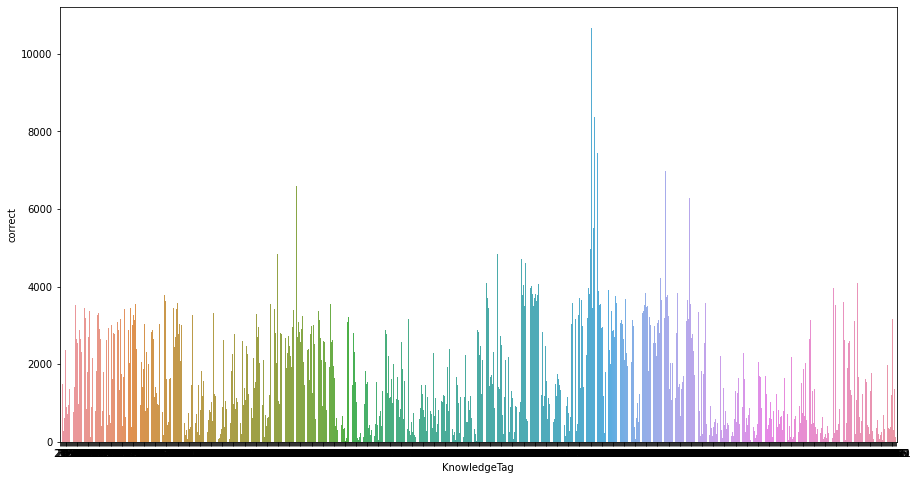

In [7]:
plt.figure(figsize = (15,8))
sns.barplot(x='KnowledgeTag', y='correct', data=count_by_tag)
plt.show()

In [10]:
count_by_tag.to_csv('./EDA_by_tag.csv')